#### 1.4.12 Template Matching

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('hmson1.avi_000079750.png',0)
img2 = img.copy()
template = cv2.imread('20201105_125557.png',0)

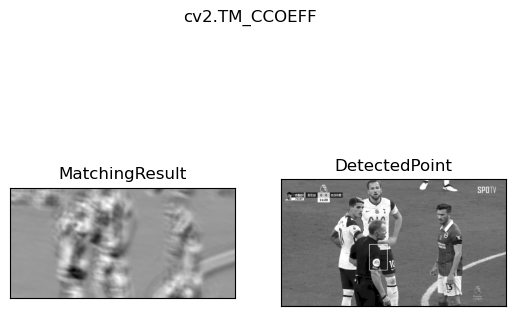

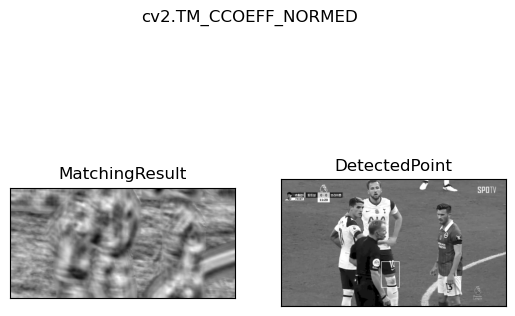

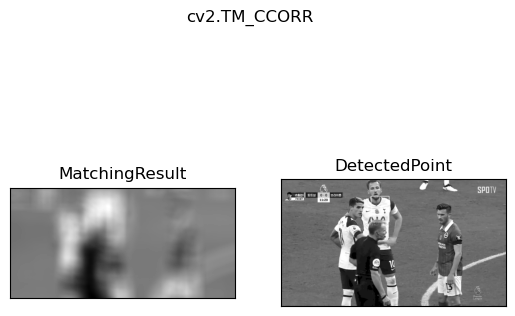

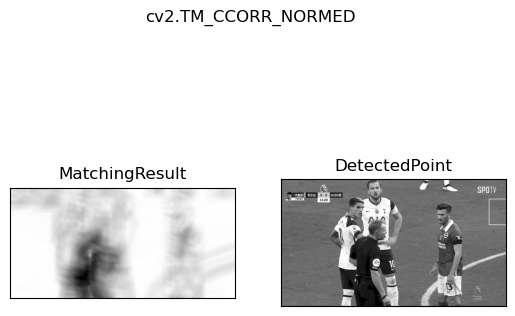

In [5]:
w,h=template.shape[::-1]
 #Allthe6methodsforcomparisoninalist
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']
for meth in methods:
 img= img2.copy()
 method=eval(meth)
 #Apply templateMatching
 res= cv2.matchTemplate(img,template,method)
 min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
 #IfthemethodisTM_SQDIFFor TM_SQDIFF_NORMED,takeminimum
 if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
  top_left=min_loc
 else:
  top_left=max_loc
  bottom_right=(top_left[0]+ w,top_left[1]+h)
  cv2.rectangle(img,top_left,bottom_right,255,2)
  plt.subplot(121),plt.imshow(res,cmap='gray')
  plt.title('MatchingResult'), plt.xticks([]),plt.yticks([])
  plt.subplot(122),plt.imshow(img,cmap='gray')
  plt.title('DetectedPoint'),plt.xticks([]),plt.yticks([])
  plt.suptitle(meth)
  plt.show()

In [25]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[164:212, 234:292]
cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

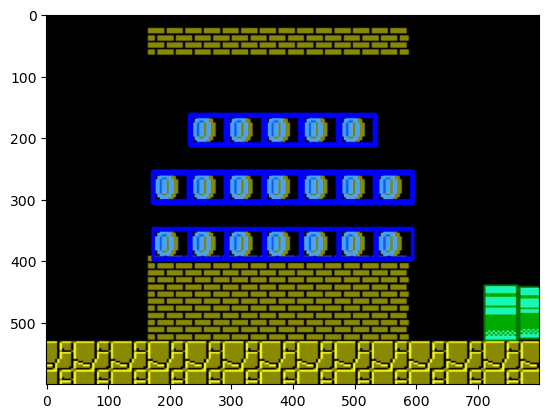

In [26]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
 cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
plt.imshow(img_rgb)

#### Hough Tranform in OpenCV

In [ ]:
img = cv2.imread('dave.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
 a = np.cos(theta)
 b = np.sin(theta)
 x0 = a*rho
 y0 = b*rho
 x1 = int(x0 + 1000*(-b))
 y1 = int(y0 + 1000*(a))
 x2 = int(x0- 1000*(-b))
 y2 = int(y0- 1000*(a))
 cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines3.jpg',img)